In [1]:
import os
import scipy.io as sio
import scipy.misc as smisc
import numpy as np
import re as regexp
import math
import matplotlib.pyplot as plt
import scipy

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

import scipy.io
import time
import glob,os
import cv2
from scipy import optimize
from pylab import *

import imutils
import cv2
import csv

In [4]:
# Test of different ratio limit penalty
parameter_test = np.load('/srv/home/chenyu/JDDC/RatioLimit_Test.npy')
RatioLimit = [0.05,0.1,0.5,1,5,10,100]
precision = np.zeros((len(RatioLimit),2))
std = np.zeros((len(RatioLimit),2))
for i in range(len(RatioLimit)):
    precision[i,0] = np.average(parameter_test[parameter_test[:,i*2]!=0,i*2])  # Only use nonzero items
    precision[i,1] = np.average(parameter_test[parameter_test[:,i*2+1]!=0,i*2+1])
    std[i,0] = np.std(parameter_test[parameter_test[:,i*2]!=0,i*2])/\
        np.sqrt(len(parameter_test[parameter_test[:,i*2]!=0,i*2]))
    std[i,1] = np.std(parameter_test[parameter_test[:,i*2+1]!=0,i*2+1])/\
        np.sqrt(len(parameter_test[parameter_test[:,i*2]!=0,i*2]))

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


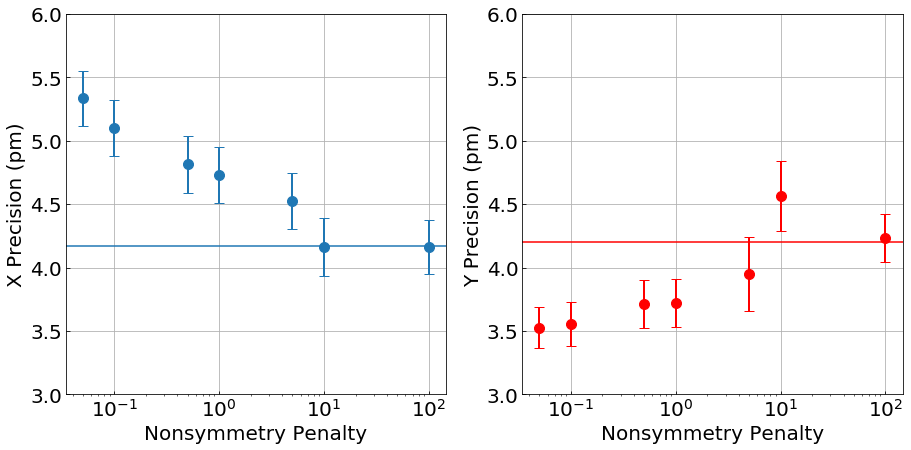

In [18]:
fig = plt.figure(figsize=(15,7))

ax = fig.add_subplot(121)
plt.errorbar(RatioLimit,precision[:,0],yerr=std[:,0],fmt='o',label = 'X Precision',capsize=5,
                  markersize = 10,elinewidth = 2)
plt.xlabel('Nonsymmetry Penalty',fontsize=20)
plt.tick_params(labelsize=20,direction='in')
plt.grid('on')
ax.set_xscale('log')
plt.ylim([3,6])
plt.ylabel('X Precision (pm)', fontsize=20)
plt.axhline(y=4.17, color='#1f77b4', linestyle='-') # line for symmetric model

ax = fig.add_subplot(122)
plt.errorbar(RatioLimit,precision[:,1],yerr=std[:,1],fmt='o',label = 'X Precision',capsize=5, c='red',
                  markersize = 10,elinewidth = 2)
plt.xlabel('Nonsymmetry Penalty',fontsize=20)
plt.tick_params(labelsize=20,direction='in')
plt.grid('on')
ax.set_xscale('log')
plt.ylim([3,6])
plt.ylabel('Y Precision (pm)', fontsize=20)
plt.axhline(y=4.20, color='r', linestyle='-') # line for symmetric model

In [43]:
# Test of different Y2-RegY parameters on experiment
parameter_test = np.load('/srv/home/chenyu/JDDC/parameter_test_exp.npy')
Y2 = [100,75,50,25,10,0]  # all the Y2 values, 0 stands for default symmetric model
precision = np.zeros((len(Y2),2))
std = np.zeros((len(Y2),2))
for i in range(len(Y2)):
    precision[i,0] = np.average(parameter_test[parameter_test[:,i*2]!=0,i*2])  # Only use nonzero items
    precision[i,1] = np.average(parameter_test[parameter_test[:,i*2+1]!=0,i*2+1])
    std[i,0] = np.std(parameter_test[parameter_test[:,i*2]!=0,i*2])/\
        np.sqrt(len(parameter_test[parameter_test[:,i*2]!=0,i*2]))
    std[i,1] = np.std(parameter_test[parameter_test[:,i*2+1]!=0,i*2+1])/\
        np.sqrt(len(parameter_test[parameter_test[:,i*2]!=0,i*2]))

NameError: name 'Y2' is not defined

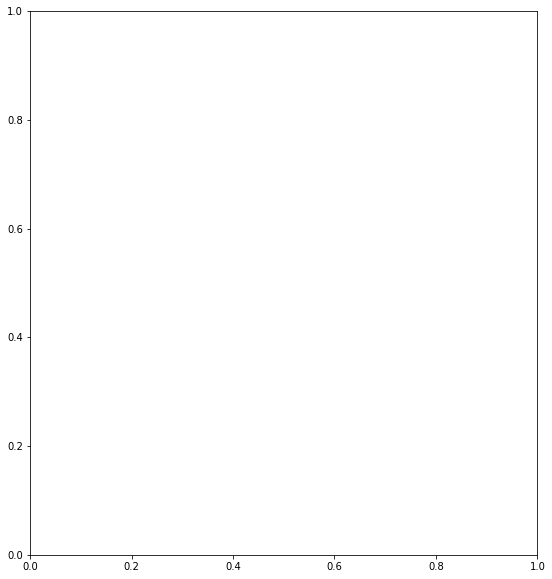

In [8]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(121)
plt.errorbar(Y2,precision[:,0],yerr=std[:,0],fmt='o',label = 'X Precision',capsize=5,
                  markersize = 10,elinewidth = 2)
plt.xlabel('Y2 Parameter',fontsize=20)
plt.tick_params(labelsize=20,direction='in')
plt.grid('on')
plt.ylim([3,5.5])
plt.ylabel('X Precision (pm)', fontsize=20)

fig.add_subplot(122)
plt.errorbar(Y2,precision[:,1],yerr=std[:,1],fmt='o',label = 'X Precision',capsize=5, c='red',
                  markersize = 10,elinewidth = 2)
plt.xlabel('Y2 Parameter',fontsize=20)
plt.tick_params(labelsize=20,direction='in')
plt.grid('on')
plt.ylim([3,5.5])
plt.ylabel('Y Precision (pm)', fontsize=20)

In [45]:
# Test of different Y2-RegY parameters on phantom-30
parameter_test = np.load('/srv/home/chenyu/JDDC/parameter_test_sim.npy')
Y2 = [100,50,25,10,0]  # all the Y2 values, 0 stands for default symmetric model
precision = np.zeros((len(Y2),2))
std = np.zeros((len(Y2),2))
for i in range(len(Y2)):
    precision[i,0] = np.average(parameter_test[parameter_test[:,i*2]!=0,i*2])  # Only use nonzero items
    precision[i,1] = np.average(parameter_test[parameter_test[:,i*2+1]!=0,i*2+1])
    std[i,0] = np.std(parameter_test[parameter_test[:,i*2]!=0,i*2])/\
        np.sqrt(len(parameter_test[parameter_test[:,i*2]!=0,i*2]))
    std[i,1] = np.std(parameter_test[parameter_test[:,i*2+1]!=0,i*2+1])/\
        np.sqrt(len(parameter_test[parameter_test[:,i*2]!=0,i*2]))

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0, 0.5, 'Y Precision (pm)')

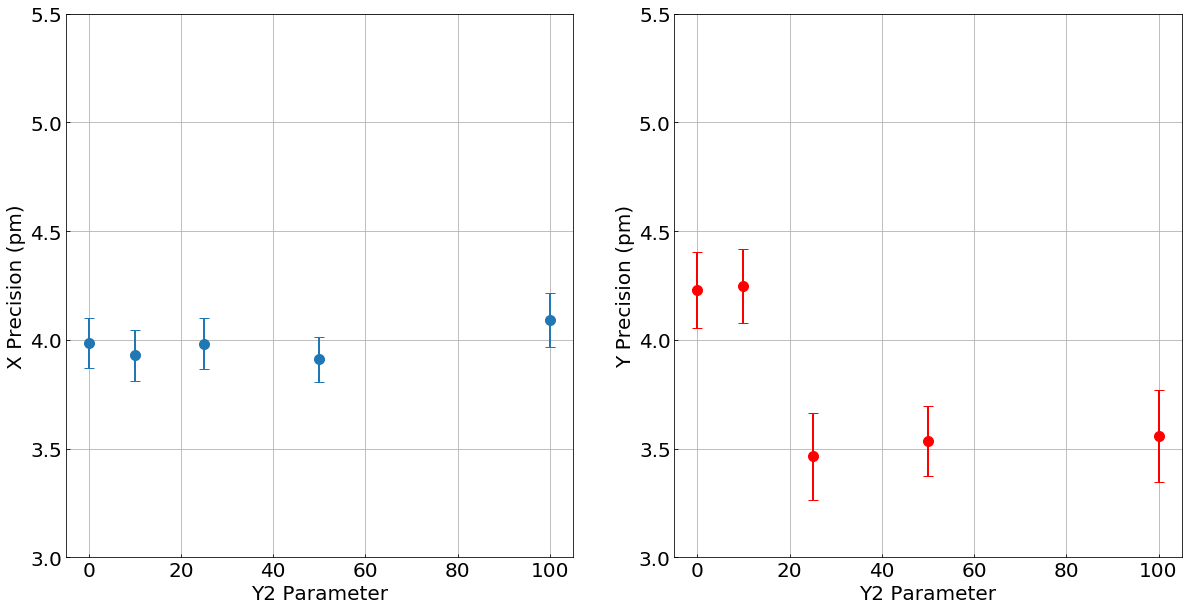

In [46]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(121)
plt.errorbar(Y2,precision[:,0],yerr=std[:,0],fmt='o',label = 'X Precision',capsize=5,
                  markersize = 10,elinewidth = 2)
plt.xlabel('Y2 Parameter',fontsize=20)
plt.tick_params(labelsize=20,direction='in')
plt.grid('on')
plt.ylim([3,5.5])
plt.ylabel('X Precision (pm)', fontsize=20)

fig.add_subplot(122)
plt.errorbar(Y2,precision[:,1],yerr=std[:,1],fmt='o',label = 'X Precision',capsize=5, c='red',
                  markersize = 10,elinewidth = 2)
plt.xlabel('Y2 Parameter',fontsize=20)
plt.tick_params(labelsize=20,direction='in')
plt.grid('on')
plt.ylim([3,5.5])
plt.ylabel('Y Precision (pm)', fontsize=20)

## Test different peak shape penalty

In [21]:
weight = [0.1,1,5,10,100]
ratio = [0.82,0.88,0.92,0.95,0.98]

/srv/home/chenyu/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.1, 0.81, 'True Y/X ratio = 0.8')

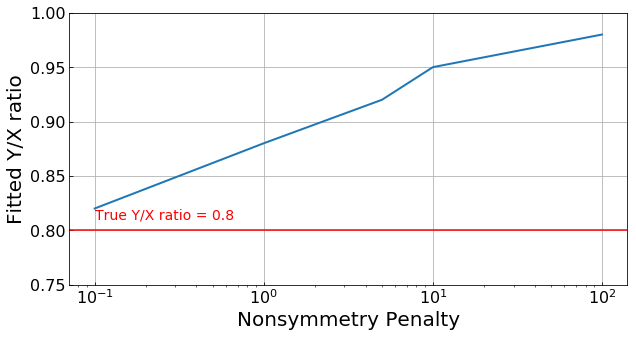

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(weight,ratio,linewidth=2)
plt.ylim([0.75,1])
ax.set_xscale('log')
ax.set_xlabel('Nonsymmetry Penalty',fontsize=20)
ax.set_ylabel('Fitted Y/X ratio',fontsize=20)
ax.tick_params(labelsize=16, direction='in')
ax.grid('on')
plt.axhline(y=0.8,color='r')
plt.text(0.1, 0.81, 'True Y/X ratio = 0.8',fontsize=14,color='r')